In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook

In [4]:
# 한글폰트
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)


In [5]:
naver_train = pd.read_csv(r'data\네이버_영화평\ratings_train.txt', delimiter='\t')
naver_train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [6]:
naver_test = pd.read_csv(r'data\네이버_영화평\ratings_test.txt', delimiter='\t')
naver_test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [7]:
train_length = naver_train['document'].astype(str).apply(len)
train_length

0         19
1         33
2         17
3         29
4         61
          ..
149995    19
149996    13
149997    31
149998    27
149999    24
Name: document, Length: 150000, dtype: int64

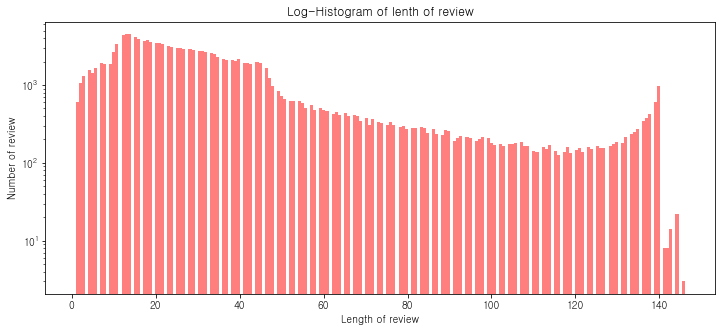

In [12]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5 , color='r', label='word')
plt.yscale('log')
plt.title('Log-Histogram of lenth of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')
plt.show()

In [13]:
train_length.describe()

count    150000.000000
mean         35.203453
std          29.531983
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         146.000000
Name: document, dtype: float64

In [14]:
print('1분위수 :', train_length.quantile(0.25))
print('3분위수 :', train_length.quantile(0.75))

1분위수 : 16.0
3분위수 : 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d3e815e290>,
 'caps': [<matplotlib.lines.Line2D at 0x1d3e815e830>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d3e815dfc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d3e815edd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d3e815f370>],
 'means': [<matplotlib.lines.Line2D at 0x1d3e815f0a0>]}

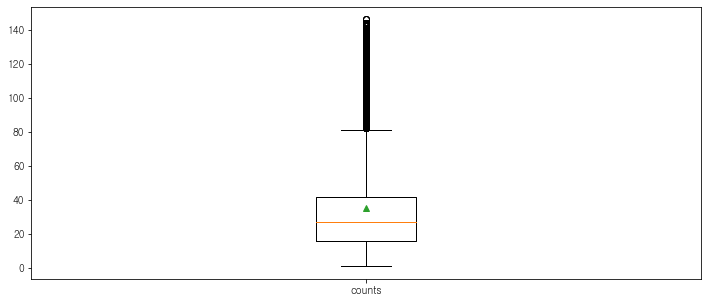

In [15]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length,
            labels=['counts'],
            showmeans=True)

In [16]:
train_review = [review for review in naver_train.document if type(review) is str]
train_review[:5], len(train_review)

(['아 더빙.. 진짜 짜증나네요 목소리',
  '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
  '너무재밓었다그래서보는것을추천한다',
  '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다'],
 149995)

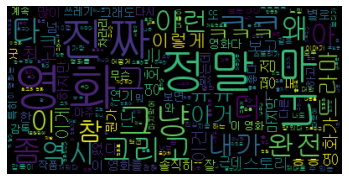

In [17]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts/gulim.ttc').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 0, 'sentiment')

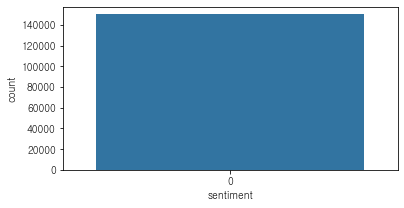

In [18]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(naver_train['label'])
plt.xlabel('sentiment')

In [19]:
naver_train.label.value_counts()

0    75173
1    74827
Name: label, dtype: int64

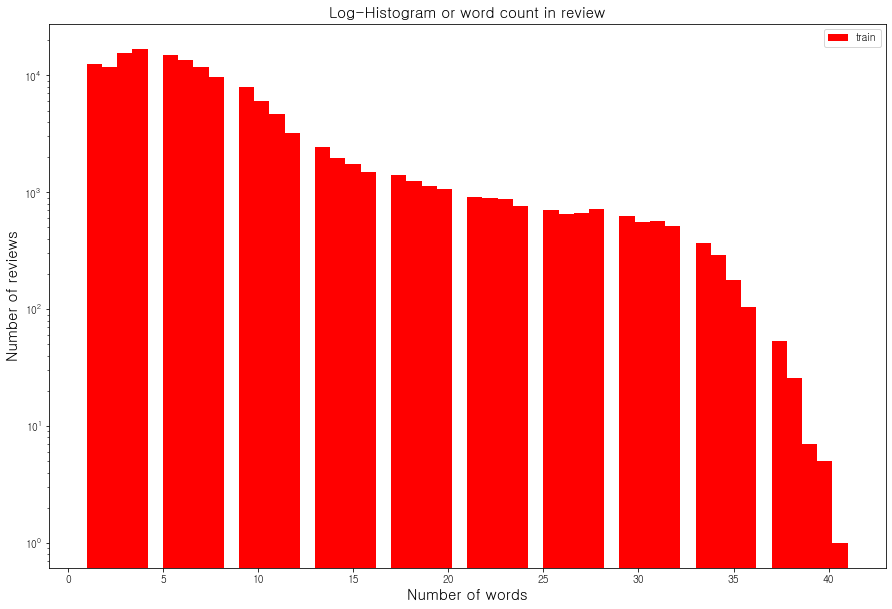

In [21]:
train_word_counts = naver_train.document.astype(str).apply(lambda x : len(x.split(' ')))
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram or word count in review', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)
plt.yscale('log')
plt.show()

In [22]:
print(train_word_counts.describe())
print('1분위수 :', train_length.quantile(0.25))
print('3분위수 :', train_length.quantile(0.75))

count    150000.000000
mean          7.584940
std           6.514063
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          41.000000
Name: document, dtype: float64
1분위수 : 16.0
3분위수 : 42.0


In [23]:
qmarks= np.mean(naver_train.document.astype('str').apply(lambda x : '?' in x))
fullstop= np.mean(naver_train.document.astype('str').apply(lambda x : '.' in x))
print('물음표가 있는 질문 : {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문 : {:.2f}%'.format(fullstop * 100))

물음표가 있는 질문 : 8.25%
마침표가 있는 질문 : 51.76%


In [26]:
import re
import json
from konlpy.tag import Okt 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [27]:
review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', '', naver_train['document'][0])
review_text

'아 더빙 진짜 짜증나네요 목소리'

In [28]:
# stemp = True 는 어간 추출
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [29]:
stop_words=['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주' , '등', '한']
clean_review = [ token for token in review_text if not token in stop_words]
clean_review


['더빙', '진짜', '짜증나다', '목소리']

In [30]:
def preprocessing(review, okt, remove_stopwords = False, stop_words=[]) :
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', '', review)

    word_review = okt.morphs(review_text, stem=True)
    if remove_stopwords :
        word_review = [ token for token in word_review if token not in stop_words]
    return word_review

In [31]:
stop_words=['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주' , '등', '한']
okt = Okt()
clean_train_review = []
for review in tqdm_notebook(naver_train.document) :
    if type(review) == str :
        clean_train_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else :
        clean_train_review.append([])
clean_train_review

  0%|          | 0/150000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
stop_words=['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주' , '등', '한']
okt = Okt()
clean_test_review = []
for review in tqdm_notebook(naver_test.document) :
    if type(review) == str :
        clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else :
        clean_test_review.append([])
clean_test_review

[['굳다', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는'],
 ['만',
  '아니다',
  '별',
  '다섯',
  '개',
  '주다',
  '왜',
  '로',
  '나오다',
  '제',
  '심기',
  '를',
  '불편하다',
  '하다'],
 ['음악', '주가', '되다', '최고', '음악', '영화'],
 ['진정하다', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나오다',
  '창의력',
  '없다',
  '로봇',
  '디자인',
  '부터가',
  '고개',
  '를',
  '젖다',
  '하다'],
 ['갈수록',
  '개판',
  '되다',
  '중국영화',
  '유치하다',
  '내용',
  '없다',
  '폼',
  '잡다',
  '끝나다',
  '말',
  '도',
  '안되다',
  '무기',
  '에',
  '유치하다',
  '남무',
  '그리다',
  '동사서독',
  '같다',
  '영화',
  '이건',
  '류',
  '류작',
  '이다'],
 ['이별', '아픔', '뒤', '에', '찾아오다', '새롭다', '인연', '기쁨', '모든', '사람', '그렇다', '않다'],
 ['괜찮다', '오랜', '만', '포켓몬스터', '잼밌', '어', '요'],
 ['한국', '독립영화', '한계', '그렇게', '아버지', '되다', '비교', '되다'],
 ['청춘',
  '아름답다',
  '그',
  '아름답다',
  '움',
  '이성',
  '을',
  '흔들다',
  '놓다',
  '찰나',
  '아름답다',
  '움',
  '을',
  '자다',
  '포착',
  '섬세하다',
  '아름답다',
  '수채화',
  '같다',
  '퀴어',
  '영화',
  '이다'],
 ['

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index

MAX_SEQUENCE_LENGTH = 8

train_inputs  = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
train_labels = np.array(naver_train.label)
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_labels = np.array(naver_test.label)

In [ ]:
DATA_IN_PATH = './data/네이버_영화평/'
TRAIN_INPUT_DATA =  'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA =  'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

import os

if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# ensure_ascii가 True이면, ascii가 아닌, 다른 문자들은 모두 이스케이프 문자로 표현됩니다.
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import json 
from tqdm import tqdm_notebook

In [32]:
DATA_IN_PATH = './data/네이버_영화평/'
TRAIN_INPUT_DATA =  'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA =  'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'


train_input = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_input = pad_sequences(train_input, maxlen = train_input.shape[1])
train_label = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

In [36]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 2
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
        'vocab_size' : prepro_configs['vocab_size'],
        'embedding_size' : 128,
        'num_filters' : 100,
        'dropout_rate' : 0.5,
        'hidden_dimension' : 250,
        'output_dimension' : 1}

In [109]:
del model

In [37]:
# 텐서 GPU 설정
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7676119159966445080
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2254123828
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3904018034636123803
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [38]:
class CNNClassifier(tf.keras.Model):

    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                        output_dim = kargs['embedding_size'])
        # kernel_constraint = max_norm(3)을 사용하면 weight vector가 3이 되는 것을 막아 급격하게 weight가 늘어나는 것을 방지 가능하다. 
        self.conv_list = [
            layers.Conv1D(
                filters = kargs['num_filters'],
                kernel_size = kernel_size,
                padding = 'valid',
                activation = tf.keras.activations.relu,
                kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.),
            )
            for kernel_size in [3, 4, 5]
        ]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                                activation = tf.keras.activations.relu,
                                kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                        activation = tf.keras.activations.sigmoid,
                        kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.))

    def call(self, x) :
        x = self.embedding(x)
        x = self.dropout(x)
        # axis=-1 은 가장 낮은 차원 기준으로 합치기
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

In [39]:
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss = tf.keras.losses.BinaryCrossentropy(),
            metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy')])

In [40]:
# min_delta 이하면 개선되도 안침
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)

checkout_path = DATA_IN_PATH + model_name + '/weights.h5'
checkout_dir = os.path.dirname(checkout_path)

# Create path if exists

if os.path.exists(checkout_dir) :
    print('{} -- Folder create complete \n'.format(checkout_dir))
else :
    os.makedirs(checkout_dir , exist_ok=True)
    print('{} -- Folder create complete \n'.format(checkout_dir))

# save_weights_only True 이면 가중치만 False 이면 모델 전체
cp_callback = ModelCheckpoint(
    checkout_path, monitor='val_accuracy', verbose=1, save_best_only=True,
    save_weights_only = True
)
history = model.fit(train_input , train_label, batch_size=BATCH_SIZE, epochs=200,
validation_split = VALID_SPLIT, callbacks =  [earlystop_callback, cp_callback])

./data/네이버_영화평/cnn_classifier_kr -- Folder create complete 

Epoch 1/200
264/264 [==============================] - ETA: 0s - loss: 0.4592 - accuracy: 0.7744
Epoch 1: val_accuracy improved from -inf to 0.82113, saving model to ./data/네이버_영화평/cnn_classifier_kr\weights.h5
264/264 [==============================] - 18s 23ms/step - loss: 0.4592 - accuracy: 0.7744 - val_loss: 0.3901 - val_accuracy: 0.8211
Epoch 2/200
264/264 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8449
Epoch 2: val_accuracy improved from 0.82113 to 0.82847, saving model to ./data/네이버_영화평/cnn_classifier_kr\weights.h5
264/264 [==============================] - 6s 21ms/step - loss: 0.3524 - accuracy: 0.8449 - val_loss: 0.3796 - val_accuracy: 0.8285
Epoch 3/200
263/264 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.8734
Epoch 3: val_accuracy did not improve from 0.82847
264/264 [==============================] - 5s 18ms/step - loss: 0.2997 - accuracy: 0.8733 - val_loss: 0

In [41]:
model.summary()

Model: "cnn_classifier_kr"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  5600896   
                                                                 
 conv1d (Conv1D)             multiple                  38500     
                                                                 
 conv1d_1 (Conv1D)           multiple                  51300     
                                                                 
 conv1d_2 (Conv1D)           multiple                  64100     
                                                                 
 global_max_pooling1d (Globa  multiple                 0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           multiple                  0         
                                                 

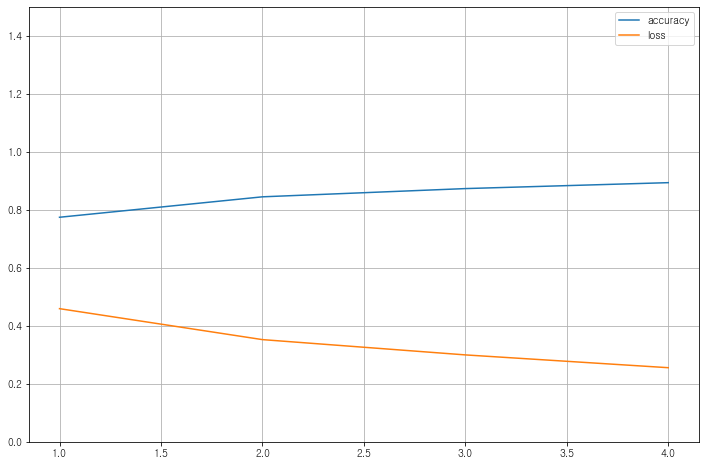

In [42]:
y_acc = history.history['accuracy']
y_loss = history.history['loss']
xs = np.arange(1, len(y_acc) + 1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()

In [44]:
DATA_IN_PATH = './data/네이버_영화평/'
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen = test_input.shape[1])
test_label_data = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

In [46]:
model.load_weights(os.path.join(DATA_IN_PATH, model_name, SAVE_FILE_NM))    
model.evaluate(test_input, test_label_data)

1563/1563 [==============================] - 9s 6ms/step - loss: 0.3807 - accuracy: 0.8294


[0.3807421028614044, 0.8294199705123901]